This exercise will explore what's going on "under the hood" when it comes to neurons and layers. There will draw parallels between the models we explored in Supervised Learning course, linear and logistic regressin, and neurons and layers. We will also be introduced to tensor flow which is a framework created by Google in 2019. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import logging

<function matplotlib.pyplot.show(close=None, block=None)>

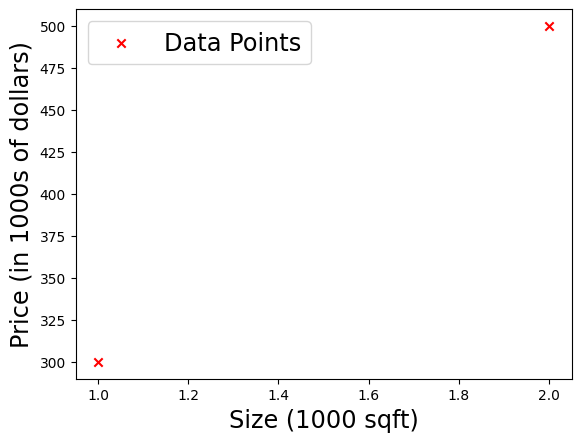

In [2]:
X_train = np.array([[1.0], [2.0]]) #(sz in 1000 sq ft)
Y_train = np.array([[300.0], [500.0]]) #(sz in 1000s of dollars

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c= 'r', label="Data Points")
ax.legend(fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize="xx-large")
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show

__Understanding Dimensions:__ When working with neural networks, it's crucial to be aware of the dimensions of your inputs and outputs. Mismatched dimensions are a common source of errors.
__
Activation Functions__: The choice of activation function is important. For linear regression, 'linear' is appropriate. Other tasks might require different activation functions (like 'relu' for hidden layers in many tasks)
.__
Weights and Biase__s: The weight represents the slope of the linear relationship, while the bias is the y-intercept in a simple linear context. These values are what the model "learns" during training.

In [3]:
# tf.keras.layers.Dense: This is a way to create a densely-connected neural network layer in TensorFlow.
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', ) # -'units=1': This specifies that the layer has a single neuron or unit.
                                                                       # -"activation='linear'": The activation function for each neuron. A linear 
                                                                       # activation function means that the output is the weighted sum of the inputs 
                                                                       # plus a bias term, without any non-linear transformation 

#This is preprocessing the first sample of your training data ('X_train[0]') by reshaping it. The reshape(1,1) ensures the input is a 2D array 
# with 1 row and column, as expected by the dense layer, ensuring the input is a 2D array
a1 = linear_layer(X_train[0].reshape(1,1)) #-'linear_layer(...)': This applies the 'linear_layer' to the reshaped input. It's effectively
                                           #calculating the linear equation y = wx + b, where 'w' is the weight, 'x' is the input, and 'b' is the bias
                                           #-'x' is the input, and 'b' is the bias.
#Retrieving weights and biases
w, b= linear_layer.get_weights() #-'get_weights()': This method retrieves the weights and biases of the layer. For a dense layer with a single unit, 
                                 #this will return a 2-element list: the first element is an array of biases (again, a single bias).
                                 #-'w, b': These are the weight and bias, respectively, of the neuron in the layer
print(f"w = {w}, b={b}")


w = [[0.6238495]], b=[0.]


A linear regression model (1) with a single input feature will have a single weight and bias. This matches the dimensions of our linear_layer above. The weights are initialized to random values so let's set them to some known values. 

In [4]:
# __Defining Custom Weights and Biases:__ The shapes of these arrays are important and should match the expected shape of the weights and biases of 
# the layer they are being applied to 

#set_w & set_b are numpy arrays that represent the values we want to assign for the layer
set_w = np.array([[200]]) #2D array 
set_b = np.array([100]) #1D array

#Setting the Weights and Biases of the Layer:
linear_layer.set_weights([set_w, set_b]) #'set_weights' is a method used to manually set the weights and biases of a TensorFlow layer. It takes a list of 
                                         # Numpy arrays as an argument, where the first array represents the weights and the second represents the biases.

print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Now lets compare the output of the TensorFlow neural network layer to a manually computed linear equation using NumPy. It helps in understanding how a neural network computes its output and verifies that the manual computation aligns with TensorFlow's computation 

In [5]:
#Computing Output with TensorFlow Layer
a1 = linear_layer(X_train[0].reshape(1,1)) #'a1 = linear_layer(X_train[0].reshape(1,1))': This line passes the first sample of your traning data 'X_train[0]'
                                           # (reshaped to a 2D array) through the 'linear_layer'. The ouput 'a1 is the result of applying the linear transformation 
                                           # (defined by th ecurrent weights and biases of 'linear_layer') to the input 
print(a1)

#Manual computation using NumPy
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b #'np.dot(set_w, X_train[0].reshape(1,1)) + set_b': Here, you're manually computing the linear equation using NumPy. 
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


__They produce the same values!__ Now we can use out linear layer to make predictions on our training data

In [6]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b
##plt_linear(X_train, Y_train, prediction_TF, prediction_np)

__Neuron with Sigmoid activation__


__DataSet__
Data preprocessing phase in ML, where you manipulate or arrange your data to make it suitable for training models or performing analyses. 

In [7]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [8]:
pos = Y_train == 1 #is a boolean mask where each element is 'True' if the corresponding element in 'Y_train' equals 1, and 'False' otherwise
neg = Y_train == 0 #is a boolean mask where each element is True if the corresponding element in Y_train equals 0, and False otherwise.

#Filtering Data Based on the Boolean Mask:
X_train[pos]  # - Here, you are using the 'pos' boolean mask to index or filter 'X-train'.
              # - 'X_train[pos]' will return all elements in 'X_train' where the corresponding value in 'pos' is 'True'. 
              # In other words, it selects all training samples from 'X_train' is 1.
              # This operation is commonly used in data processing to separate a dataset into different categories based on their labels. 
              # - For instance, in a binary classification problem, you might want to separate samples into positive and negative classes. 

array([3., 4., 5.], dtype=float32)

The concept of using boolean masks for indexing is a powerful feature in Python, especially with libraries like NumPy and Pandas. It allows for concise and efficient data selection operations.

In machine learning tasks, especially classification, you often need to separate data based on their labels. This can be for various purposes, such as analyzing the characteristics of different classes, evaluating class balance, or visualizing data.

__Create a Scatter Plot Visualization__

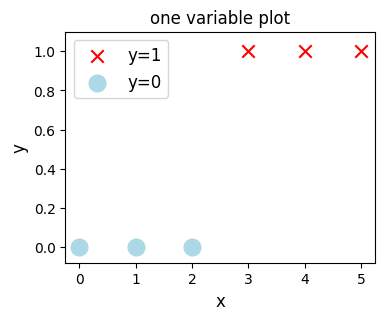

In [9]:
#Creating a Plotting Figure and Axes
fig, ax = plt.subplots(1, 1, figsize=(4, 3)) #'plt.subplots(1, 1, figsize=...))' 
                                             #creates a figure and a single subplot (or axes). The 'figuresize=(4, 3)' argument sets the figure size 
                                             # to 4 inches by 3 inches. 'fig is the figure obj and 'ax' is the axes obj on which to plot

#Plotting Data Points for y=1 (This plots the data points where 'Y_Train' equals 1 (as indicated by the 'pos' boolean mask))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label = 'y=1') 

#Plotting Data Points for y=0 (This plots the data points where 'Y_train' equals 0 (as indicated by the 'neg' boolean mask))
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, c = 'lightblue', label="y=0", lw=3)

#Setting Axes Limits and Labels
ax.set_ylim(-0.08, 1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)


#Adding Title and Legend:
ax.set_title('one variable plot')
ax.legend(fontsize=12)

plt.show()

__Logistic Neuron__

We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above. This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternative method of creating mondels. Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

In [12]:
#Defining a Simple Neural Network Model - using TensorFlow's Keras API. The 'Sequential' model is being used, which is a linear stack of layers. 
model = Sequential( #'Sequential' is a Keras model that represents a linear group of layers. It allows you to create models layer-by-layer ina  step-by-step fashion.

    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

##'tf.keras.layers.Dense(...) - ##
#This line adds a Dense layer to the model. A Dense layer is a fully connected neural network layer where each input node is connected to each output node.
# The first argument 1 signifies that this layer has one unit (or neuron). This is typical for a binary classification problem where the output is a single
# scalar value representing a probability.
# input_dim=1 specifies the number of input features to the layer. In this case, it indicates that the input to this layer (and thus the model) will have 1 feature. 
# This is an important parameter, especially for the first layer in the model, as it defines the shape of the input data the model expects.
# activation='sigmoid' sets the activation function for the neurons in this layer to the sigmoid function. The sigmoid function is commonly used in binary 
# classification tasks as it squashes the output between 0 and 1, which can be interpreted as a probability.
# # name='L1' gives this layer a name, which can be useful for referencing it later, especially in larger models.

NameError: name 'Sequential' is not defined

__Understanding the Context:__
This model is typical for a simple binary classification task, where you are trying to predict one of two possible outcomes (like yes/no, true/false, etc.) based on a single input feature.
The sigmoid activation function is a key choice here. For binary classification, it's commonly used in the output layer because it provides an output that can be interpreted as a probability.
The use of input_dim=1 is crucial. It tells the model how many features to expect in the input data. If you were working with more features, you would adjust this parameter accordingly.
The simplicity of this model (just one neuron with a sigmoid activation) means it's only capable of learning linear decision boundaries. For more complex data patterns, you would typically need more layers or neurons.

In [ ]:
model.summary()
#shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters,
#w and b 

In [ ]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

In [ ]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

In [ ]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
# alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)